In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
from Modes import ModeContainer
import numpy as onp
import matplotlib.pyplot as plt
import networkx as nx

# Study all available data

In [33]:
df=pd.read_csv("france_covid_data.csv")
df=df.drop("date",axis=1)
df

,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,...,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered
0,589.0,272296.0,24620.0,107.0,42622.0,2650.0,2.0,2.0,2.0,4.0,...,2556944.0,43551.0,25148369.0,34726580.0,609.0,609.0,55.0,55.0,664.0,664.0
1,1217.0,273513.0,24645.0,229.0,42851.0,2694.0,2.0,2.0,2.0,4.0,...,2559904.0,43914.0,25339091.0,35124318.0,683.0,1292.0,42.0,97.0,725.0,1389.0
2,1627.0,275140.0,24743.0,251.0,43102.0,2666.0,2.0,2.0,2.0,4.0,...,2571299.0,44298.0,25530897.0,35490439.0,384.0,1676.0,19.0,116.0,403.0,1792.0
3,1404.0,276544.0,24560.0,209.0,43311.0,2652.0,2.0,2.0,2.0,4.0,...,2597756.0,44601.0,25723942.0,35889993.0,443.0,2119.0,18.0,134.0,461.0,2253.0
4,1317.0,277861.0,24407.0,177.0,43488.0,2625.0,2.0,2.0,2.0,4.0,...,2617683.0,44852.0,25918163.0,36227201.0,440.0,2559.0,23.0,157.0,463.0,2716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,756.0,822964.0,19272.0,77.0,136447.0,1233.0,0.0,1.0,0.0,0.0,...,3558022.0,147257.0,231965820.0,272612209.0,1957.0,54446241.0,2027.0,53539427.0,3984.0,107985668.0
503,387.0,823351.0,18901.0,42.0,136489.0,1213.0,0.0,1.0,0.0,0.0,...,3558022.0,147331.0,232619554.0,272775929.0,1143.0,54447384.0,1169.0,53540596.0,2312.0,107987980.0
504,145.0,823496.0,18935.0,13.0,136502.0,1214.0,0.0,1.0,0.0,0.0,...,3558022.0,147352.0,233273381.0,272775929.0,280.0,54447664.0,279.0,53540875.0,559.0,107988539.0
505,900.0,824396.0,18742.0,94.0,136596.0,1199.0,0.0,1.0,0.0,0.0,...,3558022.0,147478.0,233928156.0,272775929.0,1178.0,54448842.0,1206.0,53542081.0,2384.0,107990923.0


In [34]:
node_names=df.columns
X=df.to_numpy()
X=(X-onp.mean(X,axis=0))/onp.std(X,axis=0)

In [36]:
modes=ModeContainer.make_container(
    X.T,
    onp.array(node_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.01,'type':'pairwise','interpolatory':False,'default':True},
)

In [37]:
graph_discovery=GraphDiscoveryNew(X.T,onp.array(node_names),modes)

inspecting new_hospitalized_patients
linear kernel (using gamma=4.68e+00)
 n/(n+s)=0.64, Z=0.99
quadratic kernel (using gamma=1.07e+00)
 n/(n+s)=0.55, Z=0.96
new_hospitalized_patients has ancestors with quadratic kernel (n/(s+n)=0.55)
ancestors : ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered', 'cumulative_vaccine_doses_admin

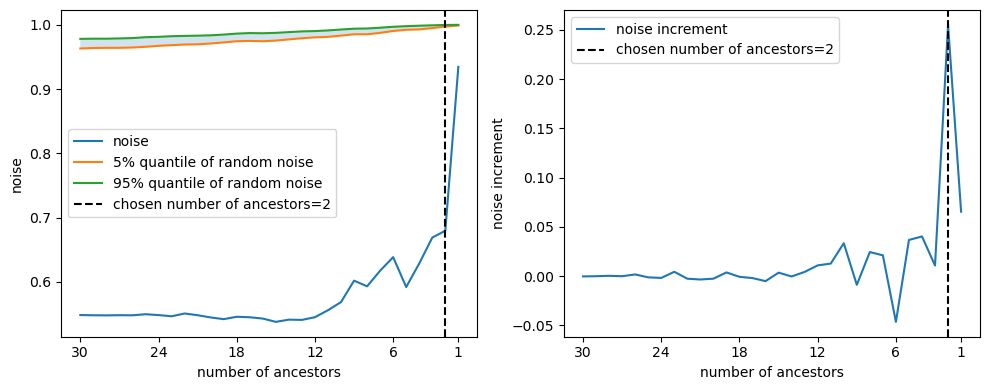

ancestors after pruning:  ['new_intensive_care_patients', 'cumulative_tested'] 



inspecting cumulative_hospitalized_patients
linear kernel (using gamma=2.05e-02)
 n/(n+s)=0.13, Z=0.99
quadratic kernel (using gamma=3.15e-03)
 n/(n+s)=0.09, Z=0.93
cumulative_hospitalized_patients has ancestors with quadratic kernel (n/(s+n)=0.09)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_pe

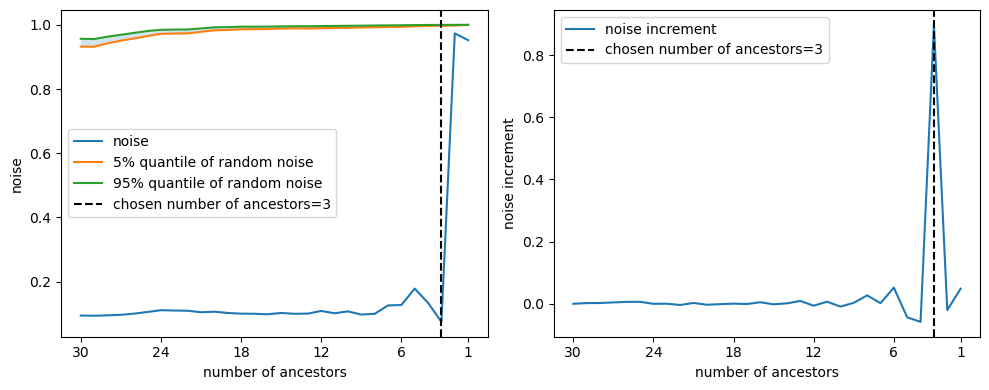

ancestors after pruning:  ['current_hospitalized_patients', 'new_recovered', 'cumulative_deceased'] 



inspecting current_hospitalized_patients
linear kernel (using gamma=3.72e-01)
 n/(n+s)=0.65, Z=0.99
quadratic kernel (using gamma=7.45e-02)
 n/(n+s)=0.47, Z=0.95
current_hospitalized_patients has ancestors with quadratic kernel (n/(s+n)=0.47)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccina

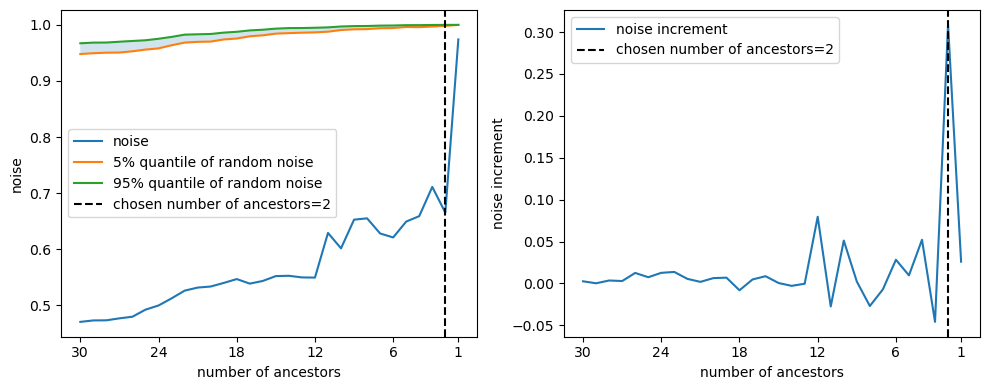

ancestors after pruning:  ['cumulative_hospitalized_patients', 'cumulative_tested'] 



inspecting new_intensive_care_patients
linear kernel (using gamma=4.48e+00)
 n/(n+s)=0.64, Z=0.99
quadratic kernel (using gamma=1.23e+00)
 n/(n+s)=0.60, Z=0.96
new_intensive_care_patients has ancestors with quadratic kernel (n/(s+n)=0.60)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cum

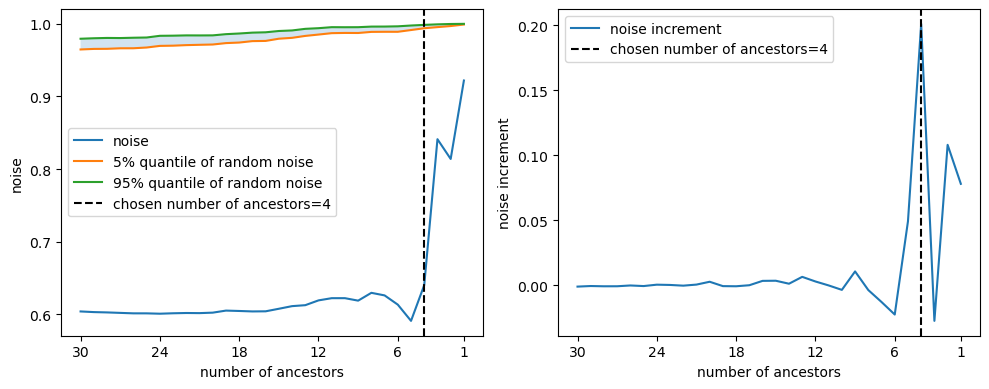

ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased'] 



inspecting cumulative_intensive_care_patients
linear kernel (using gamma=1.56e-01)
 n/(n+s)=0.44, Z=0.99
quadratic kernel (using gamma=5.72e-03)
 n/(n+s)=0.12, Z=0.93
cumulative_intensive_care_patients has ancestors with quadratic kernel (n/(s+n)=0.12)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'ne

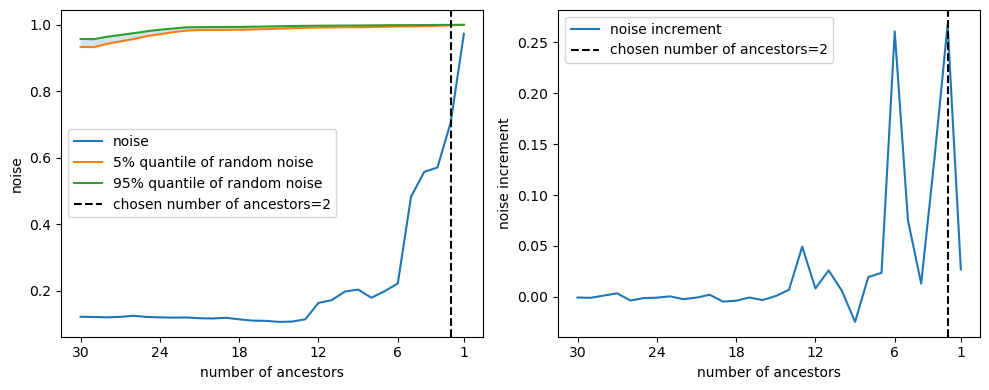

ancestors after pruning:  ['cumulative_hospitalized_patients', 'cumulative_tested'] 



inspecting current_intensive_care_patients
linear kernel (using gamma=2.19e+00)
 n/(n+s)=0.61, Z=0.99
quadratic kernel (using gamma=1.19e-01)
 n/(n+s)=0.40, Z=0.95
current_intensive_care_patients has ancestors with quadratic kernel (n/(s+n)=0.40)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'ne

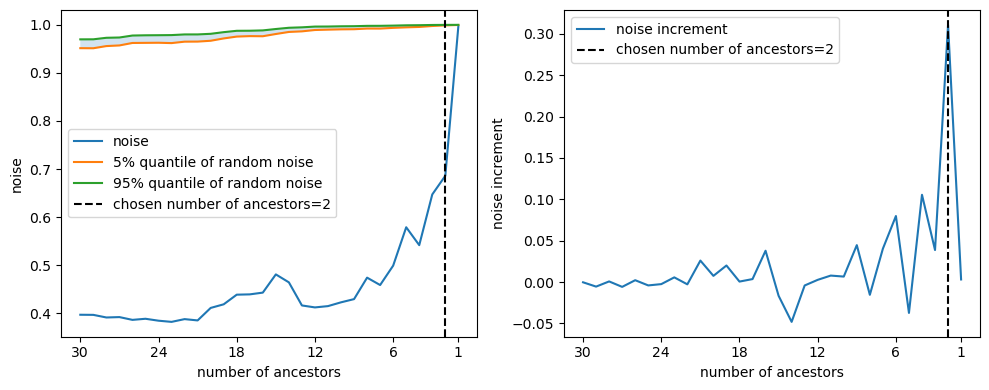

ancestors after pruning:  ['current_hospitalized_patients', 'cumulative_tested'] 



inspecting school_closing
linear kernel (using gamma=2.84e+00)
 n/(n+s)=0.66, Z=0.99
quadratic kernel (using gamma=1.19e-03)
 n/(n+s)=0.55, Z=0.93
school_closing has ancestors with quadratic kernel (n/(s+n)=0.55)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cumulative_persons_fu

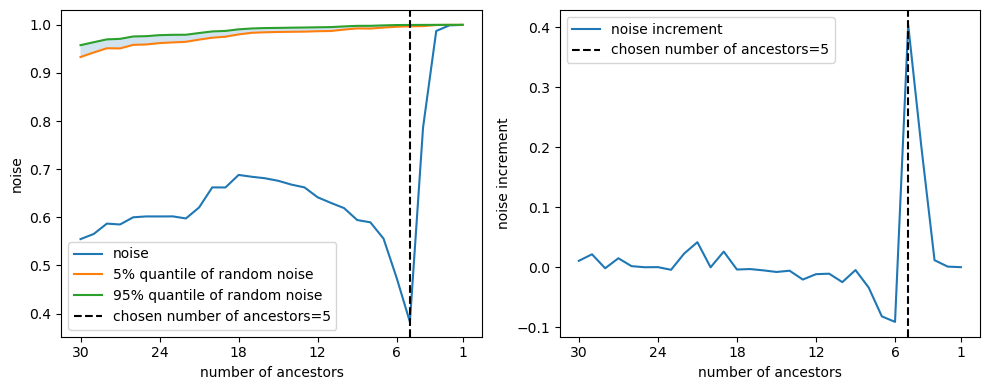

ancestors after pruning:  ['workplace_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'vaccination_policy', 'stringency_index'] 



inspecting workplace_closing
linear kernel (using gamma=5.52e+00)
 n/(n+s)=0.74, Z=0.99
quadratic kernel (using gamma=1.34e-01)
 n/(n+s)=0.66, Z=0.95
workplace_closing has ancestors with quadratic kernel (n/(s+n)=0.66)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_tested', 'new_persons_vaccinated', 'c

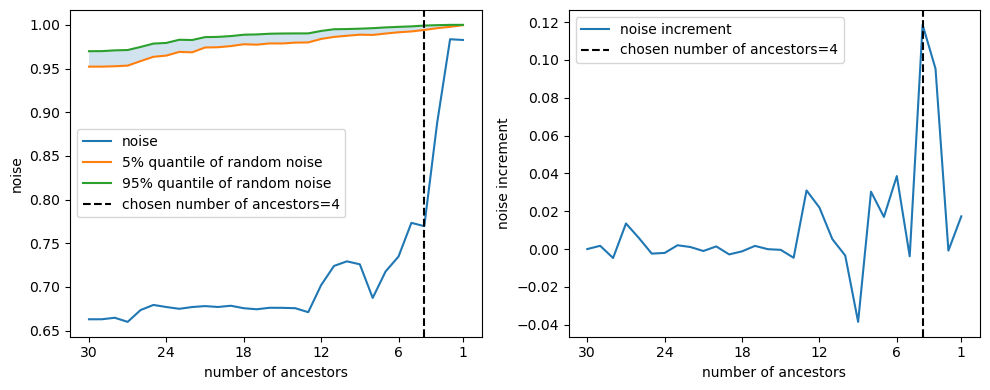

ancestors after pruning:  ['current_intensive_care_patients', 'restrictions_on_internal_movement', 'stringency_index', 'cumulative_persons_vaccinated'] 



inspecting cancel_public_events
linear kernel (using gamma=2.58e+00)
 n/(n+s)=0.69, Z=0.99
quadratic kernel (using gamma=2.69e-06)
 n/(n+s)=0.04, Z=0.93
cancel_public_events has ancestors with quadratic kernel (n/(s+n)=0.04)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_

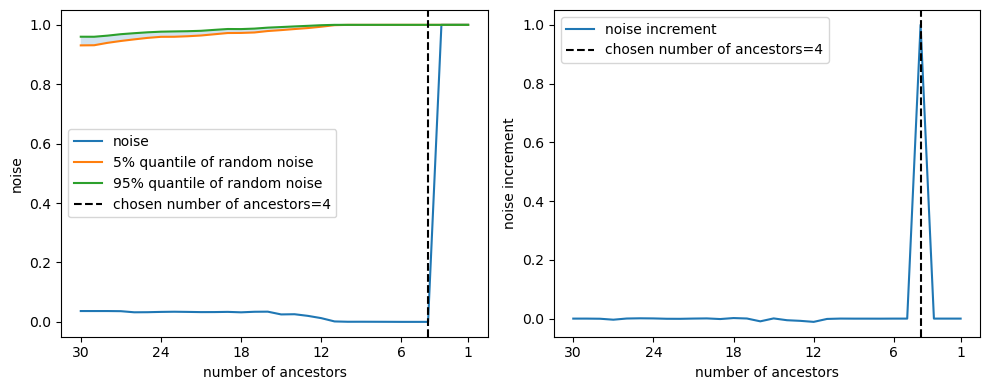

ancestors after pruning:  ['school_closing', 'workplace_closing', 'restrictions_on_gatherings', 'vaccination_policy'] 



inspecting restrictions_on_gatherings
linear kernel (using gamma=2.28e+00)
 n/(n+s)=0.75, Z=0.99
quadratic kernel (using gamma=2.46e-06)
 n/(n+s)=0.04, Z=0.93
restrictions_on_gatherings has ancestors with quadratic kernel (n/(s+n)=0.04)
ancestors : ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'ne

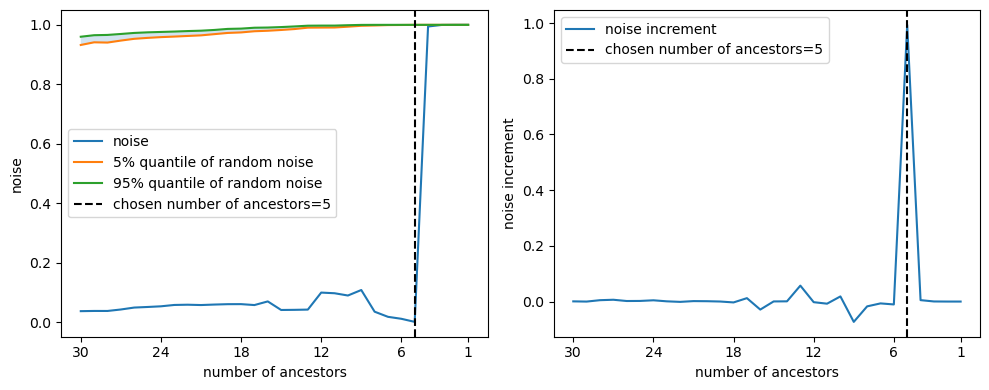

ancestors after pruning:  ['cancel_public_events', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'stringency_index'] 



inspecting public_transport_closing
linear kernel (using gamma=1.24e+00)
 n/(n+s)=0.54, Z=0.99
quadratic kernel (using gamma=1.24e-06)
 n/(n+s)=0.06, Z=0.93
public_transport_closing has ancestors with quadratic kernel (n/(s+n)=0.06)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated

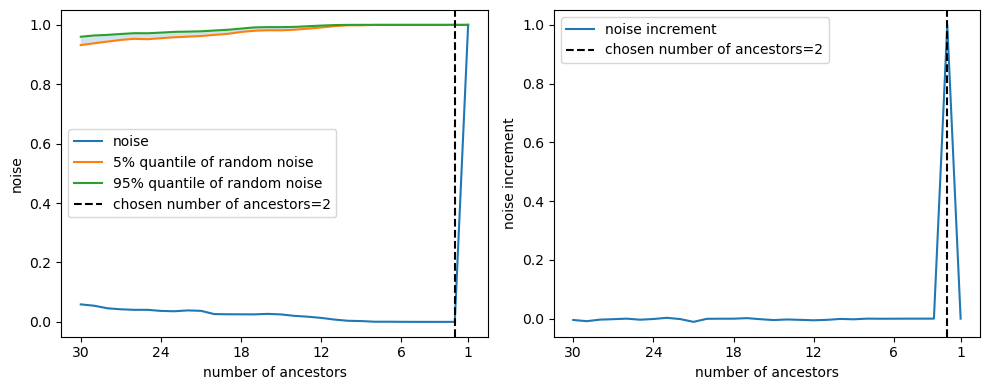

ancestors after pruning:  ['stay_at_home_requirements', 'restrictions_on_internal_movement'] 



inspecting stay_at_home_requirements
linear kernel (using gamma=2.23e+00)
 n/(n+s)=0.68, Z=0.99
quadratic kernel (using gamma=3.30e-06)
 n/(n+s)=0.02, Z=0.93
stay_at_home_requirements has ancestors with quadratic kernel (n/(s+n)=0.02)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 

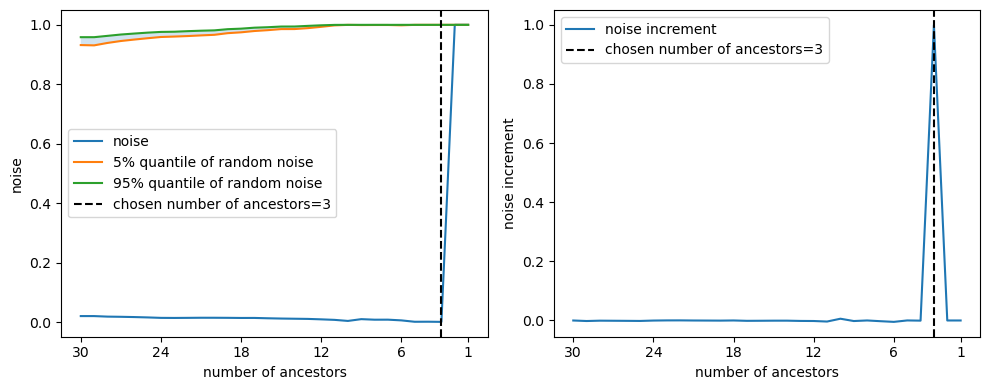

ancestors after pruning:  ['cancel_public_events', 'restrictions_on_gatherings', 'stringency_index'] 



inspecting restrictions_on_internal_movement
linear kernel (using gamma=2.68e+00)
 n/(n+s)=0.73, Z=0.99
quadratic kernel (using gamma=4.13e-03)
 n/(n+s)=0.49, Z=0.94
restrictions_on_internal_movement has ancestors with quadratic kernel (n/(s+n)=0.49)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_perso

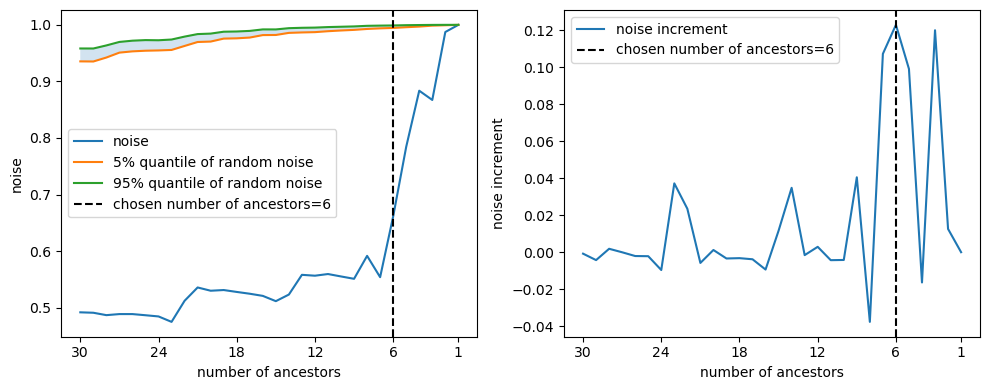

ancestors after pruning:  ['current_intensive_care_patients', 'workplace_closing', 'stay_at_home_requirements', 'vaccination_policy', 'stringency_index', 'cumulative_persons_fully_vaccinated'] 



inspecting income_support
linear kernel (using gamma=2.42e+00)
 n/(n+s)=0.81, Z=0.99
quadratic kernel (using gamma=4.87e-06)
 n/(n+s)=0.04, Z=0.93
income_support has ancestors with quadratic kernel (n/(s+n)=0.04)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', '

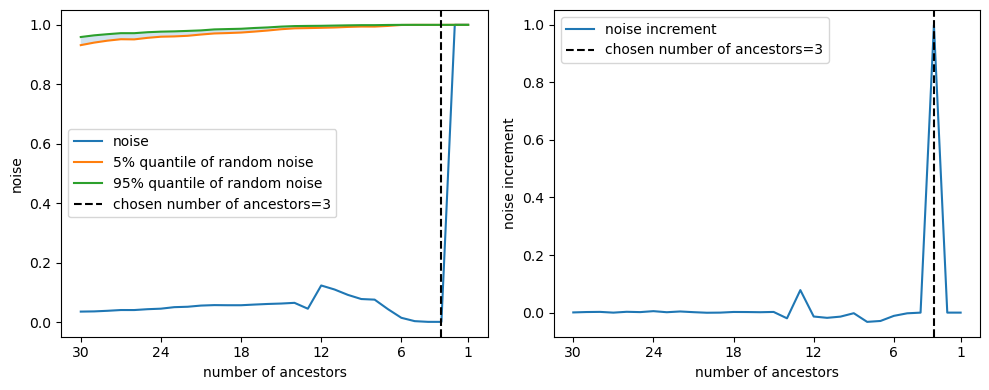

ancestors after pruning:  ['restrictions_on_gatherings', 'public_transport_closing', 'stringency_index'] 



inspecting facial_coverings
linear kernel (using gamma=5.95e+00)
 n/(n+s)=0.82, Z=0.99
quadratic kernel (using gamma=1.56e+00)
 n/(n+s)=0.78, Z=0.97
facial_coverings has ancestors with quadratic kernel (n/(s+n)=0.78)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fu

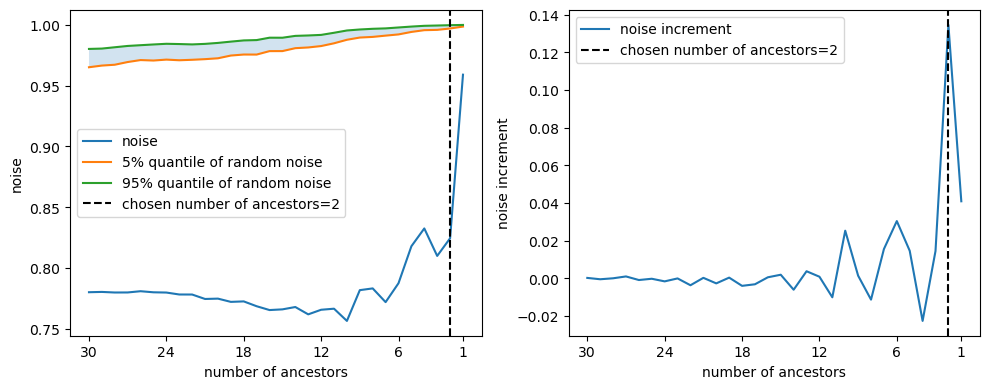

ancestors after pruning:  ['current_intensive_care_patients', 'cumulative_tested'] 



inspecting vaccination_policy
linear kernel (using gamma=4.09e+00)
 n/(n+s)=0.70, Z=0.99
quadratic kernel (using gamma=5.25e-01)
 n/(n+s)=0.77, Z=0.96
vaccination_policy has ancestors with linear kernel (n/(s+n)=0.70)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cumulative_perso

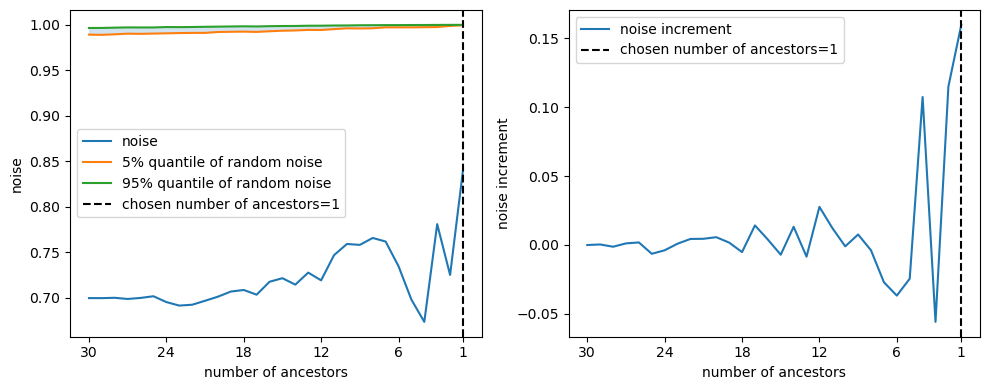

ancestors after pruning:  ['cumulative_persons_vaccinated'] 



inspecting stringency_index
linear kernel (using gamma=6.70e-01)
 n/(n+s)=0.20, Z=0.99
quadratic kernel (using gamma=3.71e-02)
 n/(n+s)=0.30, Z=0.94
stringency_index has ancestors with linear kernel (n/(s+n)=0.20)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cumulative_persons_fully_vaccinated'

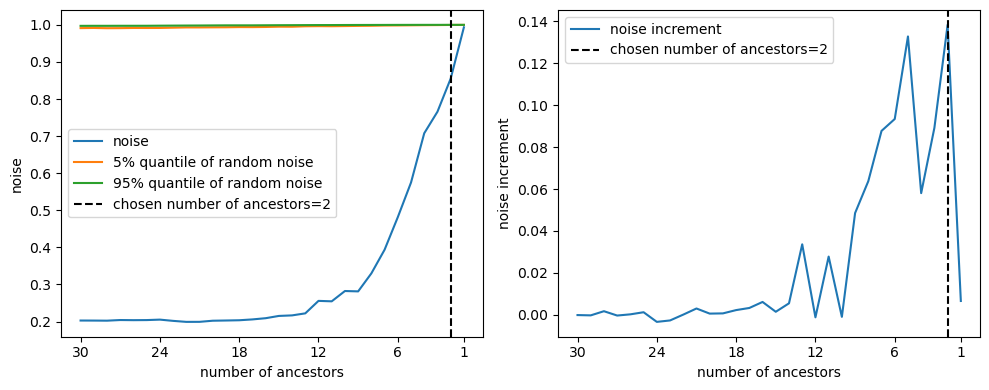

ancestors after pruning:  ['public_transport_closing', 'stay_at_home_requirements'] 



inspecting new_confirmed
linear kernel (using gamma=9.18e+00)
 n/(n+s)=0.82, Z=0.99
quadratic kernel (using gamma=2.27e+00)
 n/(n+s)=0.75, Z=0.97
new_confirmed has ancestors with quadratic kernel (n/(s+n)=0.75)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cumulative_p

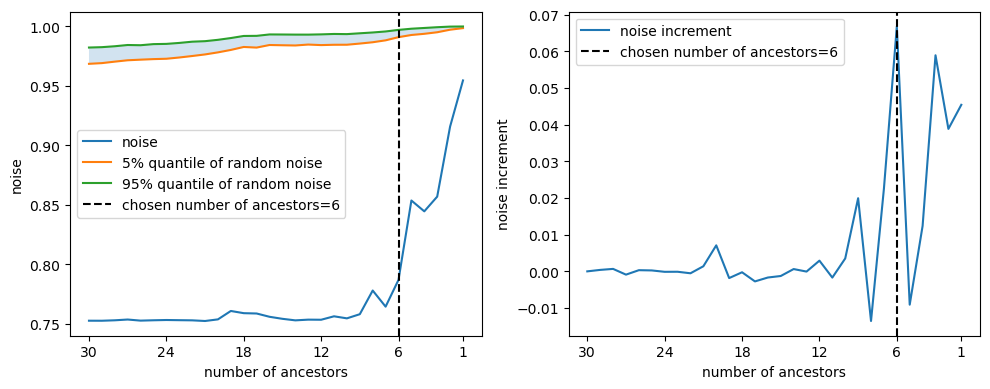

ancestors after pruning:  ['new_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_gatherings', 'public_transport_closing', 'new_deceased', 'cumulative_tested'] 



inspecting new_deceased
linear kernel (using gamma=8.97e+00)
 n/(n+s)=0.79, Z=0.99
quadratic kernel (using gamma=1.74e+00)
 n/(n+s)=0.87, Z=0.97
new_deceased has ancestors with linear kernel (n/(s+n)=0.79)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vacci

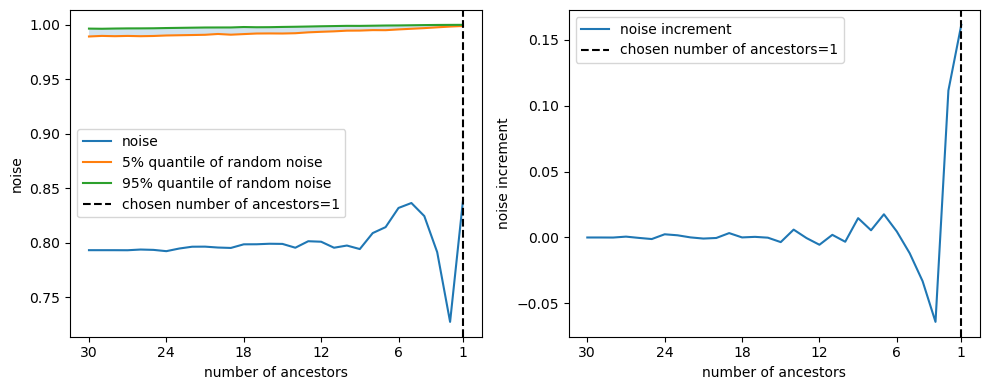

ancestors after pruning:  ['new_hospitalized_patients'] 



inspecting new_recovered
linear kernel (using gamma=2.26e-02)
 n/(n+s)=0.21, Z=0.99
quadratic kernel (using gamma=4.36e-03)
 n/(n+s)=0.10, Z=0.93
new_recovered has ancestors with quadratic kernel (n/(s+n)=0.10)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'cumulative_perso

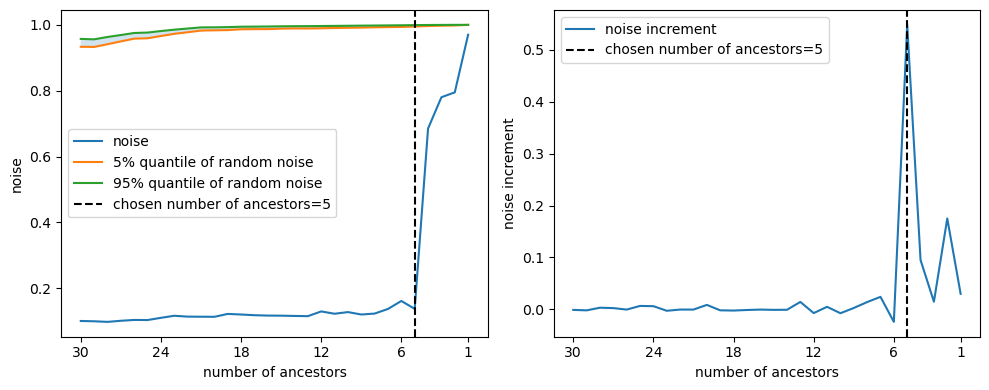

ancestors after pruning:  ['cumulative_hospitalized_patients', 'current_hospitalized_patients', 'cumulative_intensive_care_patients', 'cumulative_deceased', 'cumulative_tested'] 



inspecting new_tested
linear kernel (using gamma=8.86e+00)
 n/(n+s)=0.74, Z=0.99
quadratic kernel (using gamma=1.92e+00)
 n/(n+s)=0.74, Z=0.97
new_tested has ancestors with linear kernel (n/(s+n)=0.74)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'new_persons_

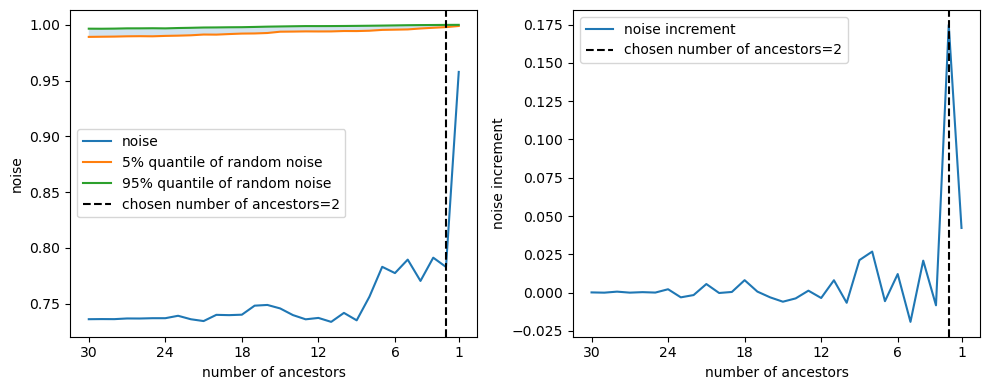

ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients'] 



inspecting cumulative_confirmed
linear kernel (using gamma=2.09e+00)
 n/(n+s)=0.65, Z=0.99
quadratic kernel (using gamma=3.02e-02)
 n/(n+s)=0.39, Z=0.94
cumulative_confirmed has ancestors with quadratic kernel (n/(s+n)=0.39)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccina

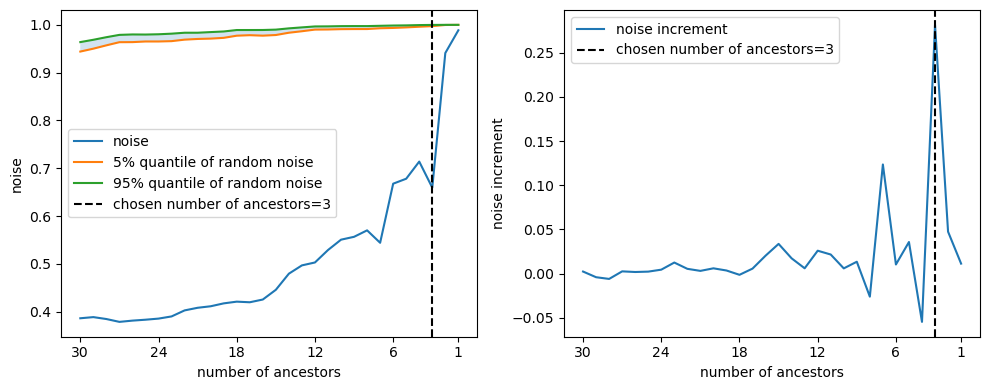

ancestors after pruning:  ['cumulative_hospitalized_patients', 'current_intensive_care_patients', 'cumulative_deceased'] 



inspecting cumulative_deceased
linear kernel (using gamma=1.64e+00)
 n/(n+s)=0.57, Z=0.99
quadratic kernel (using gamma=2.53e-01)
 n/(n+s)=0.72, Z=0.95
cumulative_deceased has ancestors with linear kernel (n/(s+n)=0.57)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_recovered', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated'

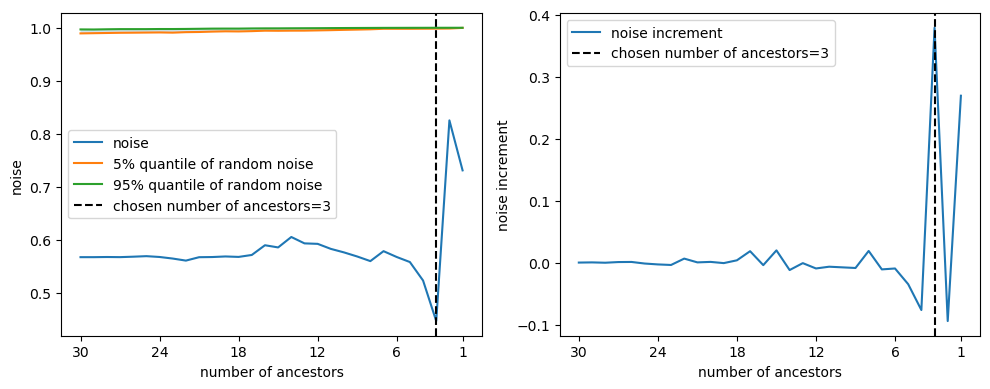

ancestors after pruning:  ['cumulative_intensive_care_patients', 'new_recovered', 'cumulative_confirmed'] 



inspecting cumulative_recovered
linear kernel (using gamma=6.53e-01)
 n/(n+s)=0.59, Z=0.99
quadratic kernel (using gamma=2.02e-02)
 n/(n+s)=0.37, Z=0.94
cumulative_recovered has ancestors with quadratic kernel (n/(s+n)=0.37)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_deceased', 'new_recovered', 'new_tested', 'cumulative_deceased', 'cumulative_tested', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_ful

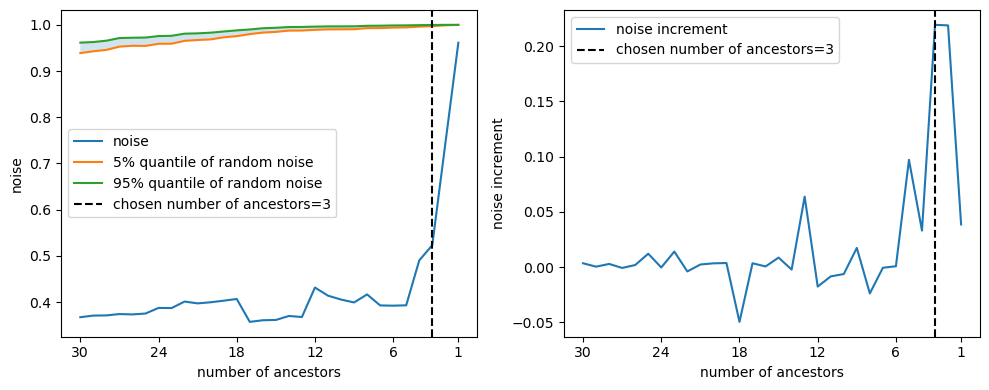

ancestors after pruning:  ['income_support', 'new_recovered', 'cumulative_tested'] 



inspecting cumulative_tested
linear kernel (using gamma=5.19e-01)
 n/(n+s)=0.41, Z=0.99
quadratic kernel (using gamma=1.20e-02)
 n/(n+s)=0.20, Z=0.94
cumulative_tested has ancestors with quadratic kernel (n/(s+n)=0.20)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_policy', 'stringency_index', 'new_confirmed', 'new_recovered', 'new_tested', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_persons_fully_vaccinated', 'c

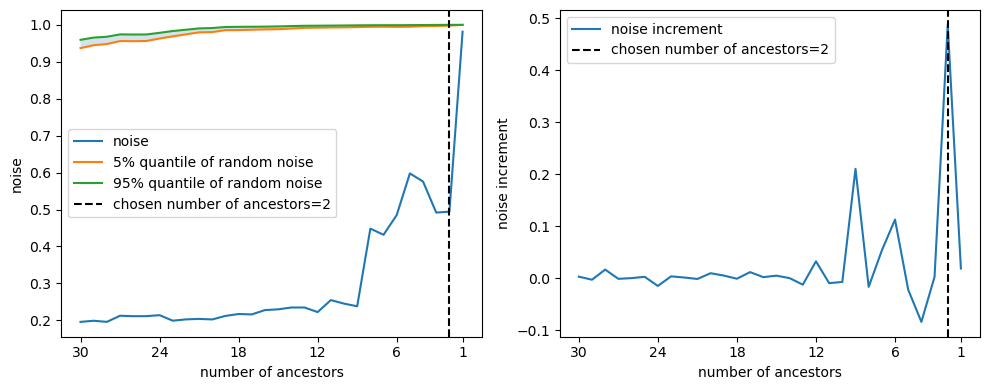

ancestors after pruning:  ['cumulative_intensive_care_patients', 'cumulative_vaccine_doses_administered'] 



inspecting new_persons_vaccinated
gamma too small for set tolerance(2.24e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
quadratic kernel (using gamma=2.43e-08)
 n/(n+s)=0.00, Z=0.91
new_persons_vaccinated has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coveri

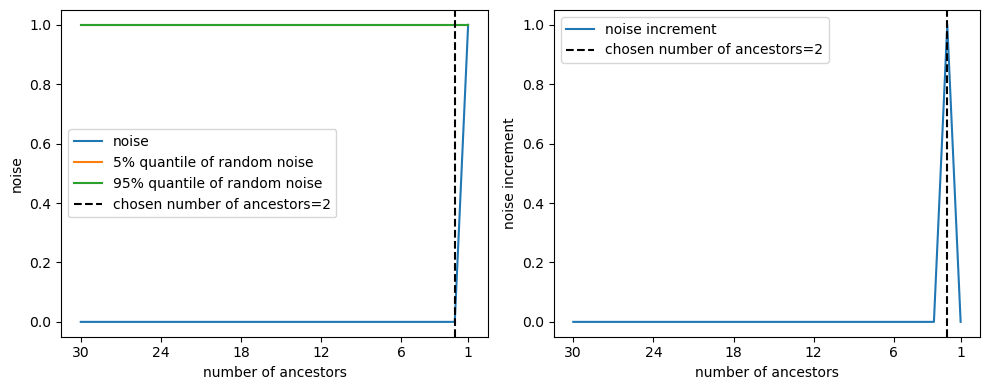

ancestors after pruning:  ['new_persons_fully_vaccinated', 'new_vaccine_doses_administered'] 



inspecting cumulative_persons_vaccinated
gamma too small for set tolerance(8.09e-12), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
quadratic kernel (using gamma=2.30e-06)
 n/(n+s)=0.19, Z=0.93
cumulative_persons_vaccinated has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_cover

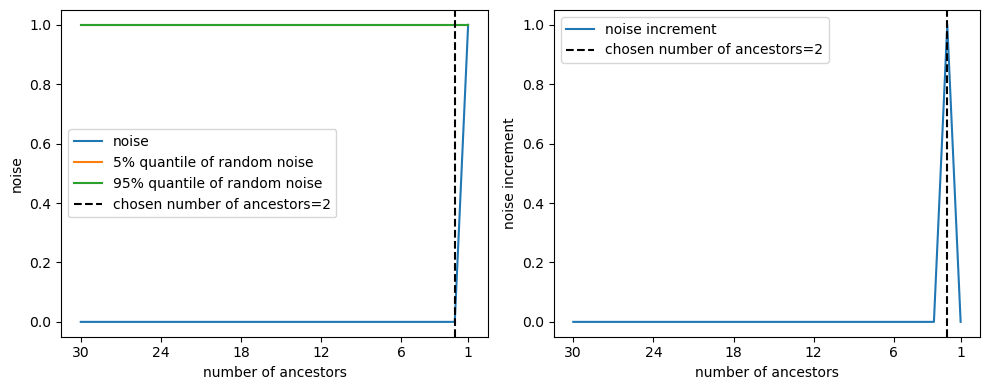

ancestors after pruning:  ['cumulative_persons_fully_vaccinated', 'cumulative_vaccine_doses_administered'] 



inspecting new_persons_fully_vaccinated
gamma too small for set tolerance(1.81e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
quadratic kernel (using gamma=1.77e-08)
 n/(n+s)=0.00, Z=0.91
new_persons_fully_vaccinated has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', '

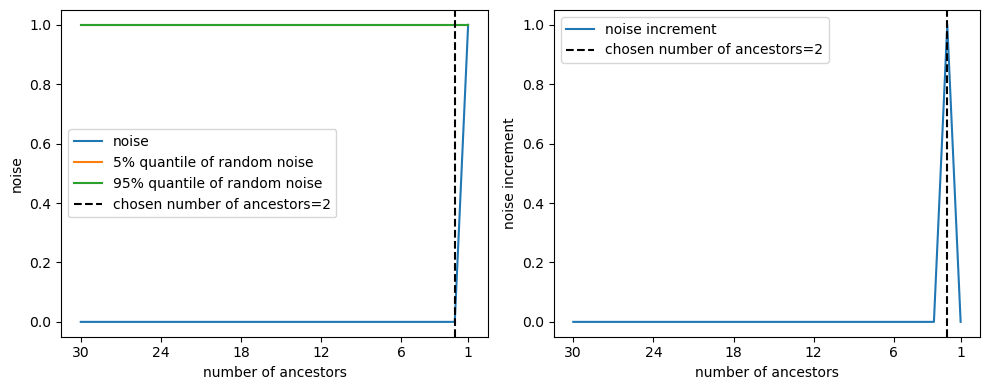

ancestors after pruning:  ['new_persons_vaccinated', 'new_vaccine_doses_administered'] 



inspecting cumulative_persons_fully_vaccinated
gamma too small for set tolerance(1.34e-11), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
quadratic kernel (using gamma=4.06e-06)
 n/(n+s)=0.20, Z=0.93
cumulative_persons_fully_vaccinated has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccinatio

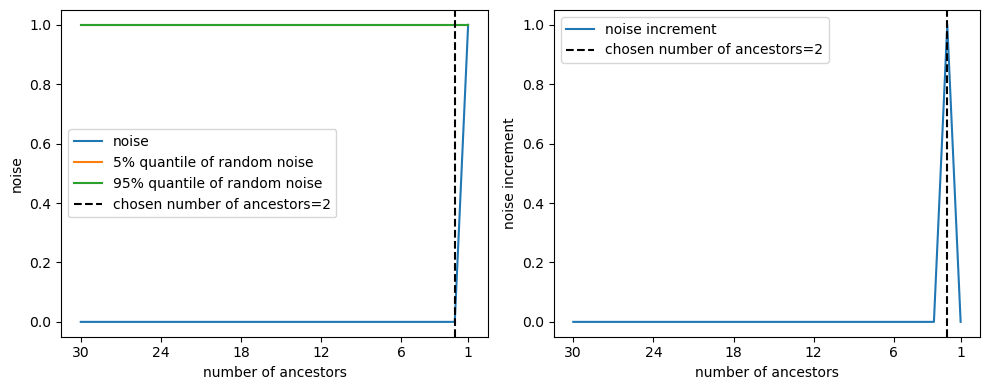

ancestors after pruning:  ['cumulative_persons_vaccinated', 'cumulative_vaccine_doses_administered'] 



inspecting new_vaccine_doses_administered
gamma too small for set tolerance(3.39e-14), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
quadratic kernel (using gamma=2.20e-09)
 n/(n+s)=0.00, Z=0.92
new_vaccine_doses_administered has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'facial_coverings', 'vaccination_pol

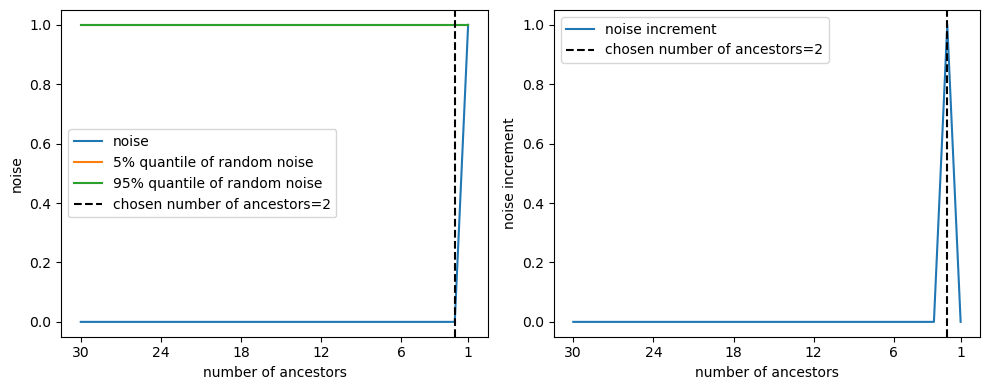

ancestors after pruning:  ['new_persons_vaccinated', 'new_persons_fully_vaccinated'] 



inspecting cumulative_vaccine_doses_administered
gamma too small for set tolerance(2.36e-13), using 1.00e-09 instead
This can either mean that the noise is very low or there is an issue in the automatic determination of gamma. To change the tolerance, change parameter gamma_min
linear kernel (using gamma=1.00e-09)
 n/(n+s)=0.00, Z=1.00
quadratic kernel (using gamma=2.75e-07)
 n/(n+s)=0.02, Z=0.92
cumulative_vaccine_doses_administered has ancestors with linear kernel (n/(s+n)=0.00)
ancestors : ['new_hospitalized_patients', 'cumulative_hospitalized_patients', 'current_hospitalized_patients', 'new_intensive_care_patients', 'cumulative_intensive_care_patients', 'current_intensive_care_patients', 'school_closing', 'workplace_closing', 'cancel_public_events', 'restrictions_on_gatherings', 'public_transport_closing', 'stay_at_home_requirements', 'restrictions_on_internal_movement', 'income_support', 'faci

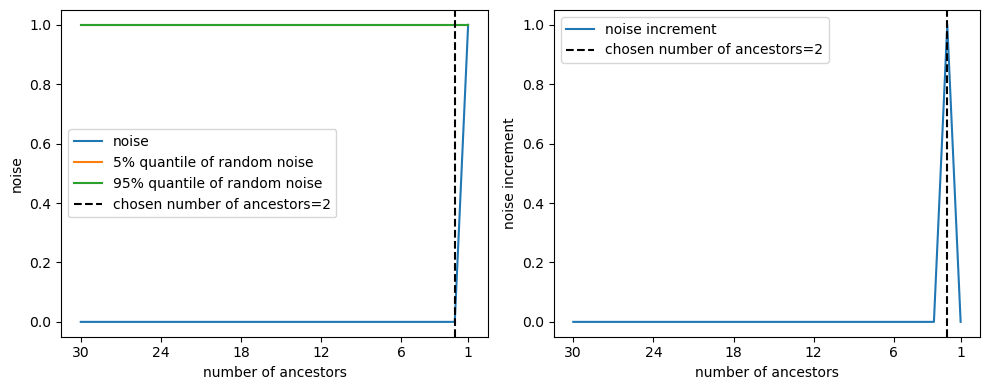

ancestors after pruning:  ['cumulative_persons_vaccinated', 'cumulative_persons_fully_vaccinated'] 





In [38]:
for node in graph_discovery.names:
    print(f'inspecting {node}')
    graph_discovery.find_ancestors(
        node,
        gamma='auto',
    )
    print('\n')

In [39]:
import pickle

with open('full_covid_graph.pickle', 'rb') as f:  # notice the r instead of w
    G_loaded = pickle.load(f)

In [41]:
def plot_a_network(G,type_label=True):
    pos=nx.kamada_kawai_layout(G, G.nodes())
    nx.draw(G, with_labels=True, pos=pos, node_size=600, font_size=8, alpha=0.6)
    if type_label:
        nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'type'))
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.25
    plt.xlim(x_min - x_margin, x_max + x_margin)

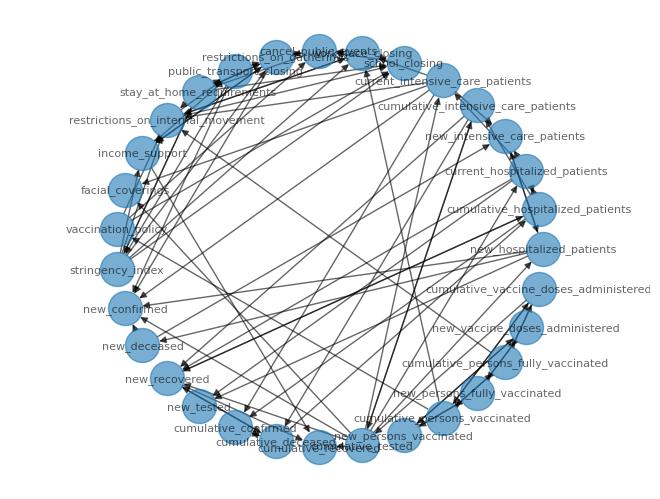

In [42]:
plot_a_network(G_loaded,False)

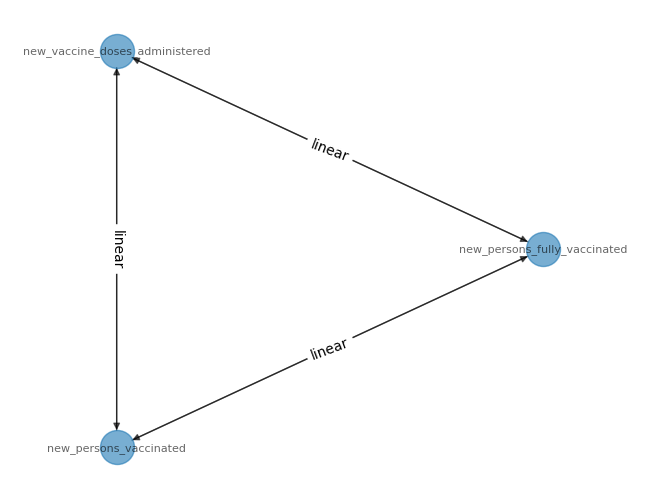

In [51]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'new_persons_fully_vaccinated',undirected=False,radius=2).reverse())

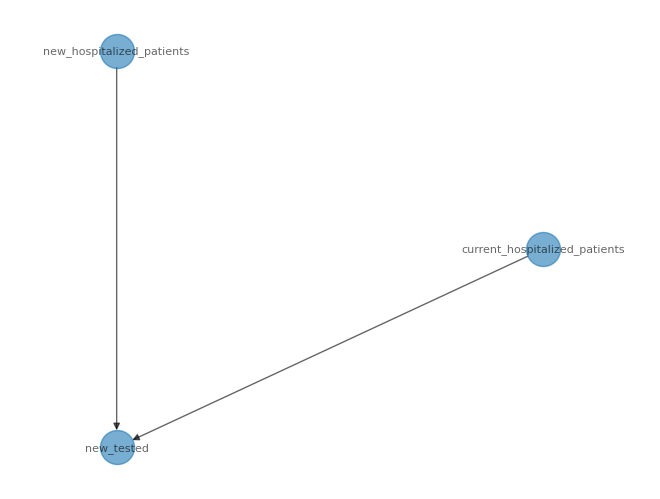

In [56]:
plot_a_network(nx.ego_graph(graph_discovery.G.reverse(),'new_tested',undirected=False,radius=1).reverse(),False)

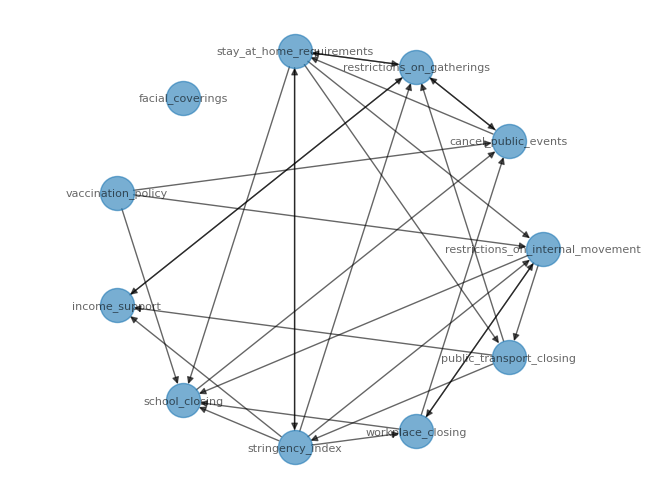

In [60]:
G_gov=graph_discovery.G.subgraph([
       'school_closing', 'workplace_closing', 'cancel_public_events',
       'restrictions_on_gatherings', 'public_transport_closing',
       'stay_at_home_requirements', 'restrictions_on_internal_movement',
       'income_support', 'facial_coverings', 'vaccination_policy',
       'stringency_index'])
plot_a_network(G_gov,False)

# Delete redundant information

In [70]:
reduced_names = ['new_hospitalized_patients',
       'current_hospitalized_patients','current_intensive_care_patients',
       'restrictions_on_internal_movement', 'new_confirmed', 'new_deceased',
       'new_tested', 
       'new_vaccine_doses_administered','facial_coverings', 'vaccination_policy',
       'stringency_index']

In [71]:

X_reduced=df[reduced_names].to_numpy()
X_reduced=(X_reduced-onp.mean(X_reduced,axis=0))/onp.std(X_reduced,axis=0)

inspecting new_hospitalized_patients
linear kernel (using gamma=7.41e+00)
 n/(n+s)=0.68, Z=0.99
quadratic kernel (using gamma=3.91e+00)
 n/(n+s)=0.58, Z=0.98
what about median ? 0.7257880092405244
gaussian kernel (using gamma=6.51e-01)
 n/(n+s)=0.67, Z=0.80
new_hospitalized_patients has ancestors with quadratic kernel (n/(s+n)=0.58)
ancestors : ['current_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered', 'facial_coverings', 'vaccination_policy', 'stringency_index']
 n/(n+s)=0.59, Z=0.98
ancestors : ['current_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered', 'vaccination_policy', 'stringency_index']
 n/(n+s)=0.58, Z=0.98
ancestors : ['current_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered', 'vaccination_policy']
 n/(n+s)=

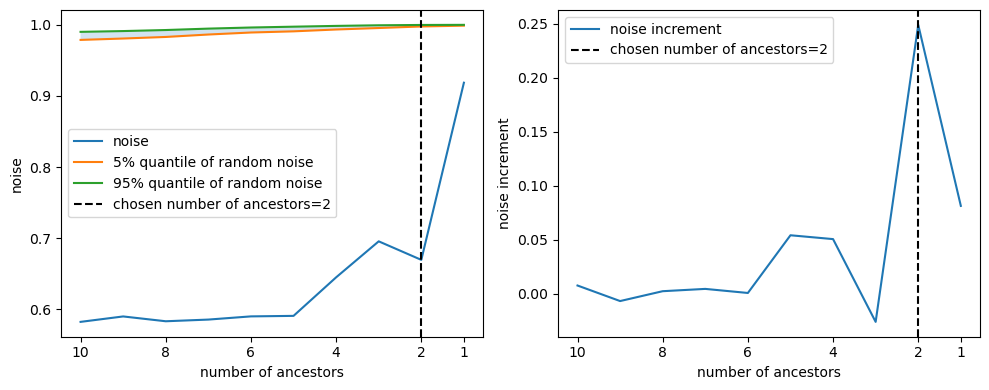

ancestors after pruning:  ['current_hospitalized_patients', 'new_tested'] 



inspecting current_hospitalized_patients
linear kernel (using gamma=6.69e+00)
 n/(n+s)=0.62, Z=0.99
quadratic kernel (using gamma=3.21e+00)
 n/(n+s)=0.55, Z=0.98
what about median ? 1.0770313624531098
gaussian kernel (using gamma=9.47e-01)
 n/(n+s)=0.47, Z=0.78
current_hospitalized_patients has ancestors with gaussian kernel (n/(s+n)=0.47)
what about median ? 0.49130870071984384
ancestors : ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered', 'facial_coverings', 'vaccination_policy', 'stringency_index']
 n/(n+s)=0.48, Z=0.78
what about median ? 0.1162671210641725
ancestors : ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'facial_coverings', 'vaccination_policy', 'stringency_index']
 n/(n+s)=0.50, Z=0.81
what about median ? 0.038212880301205586
ancestors 

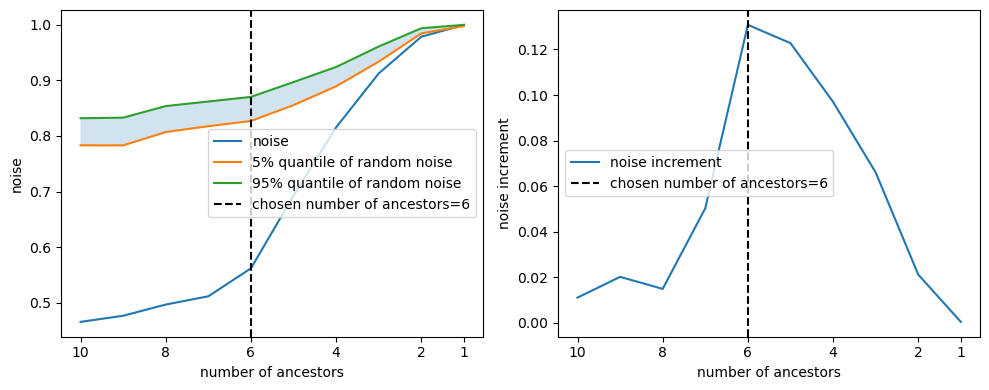

ancestors after pruning:  ['new_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'stringency_index'] 



inspecting current_intensive_care_patients
linear kernel (using gamma=6.94e+00)
 n/(n+s)=0.62, Z=0.99
quadratic kernel (using gamma=2.83e+00)
 n/(n+s)=0.49, Z=0.98
what about median ? 1.0471901468686706
gaussian kernel (using gamma=9.33e-01)
 n/(n+s)=0.35, Z=0.78
current_intensive_care_patients has ancestors with gaussian kernel (n/(s+n)=0.35)
what about median ? 0.4681260876945384
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered', 'facial_coverings', 'vaccination_policy', 'stringency_index']
 n/(n+s)=0.39, Z=0.79
what about median ? 0.10582136437277247
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'new_tested', 'facial_coverings', 'vaccination_policy', 'stringen

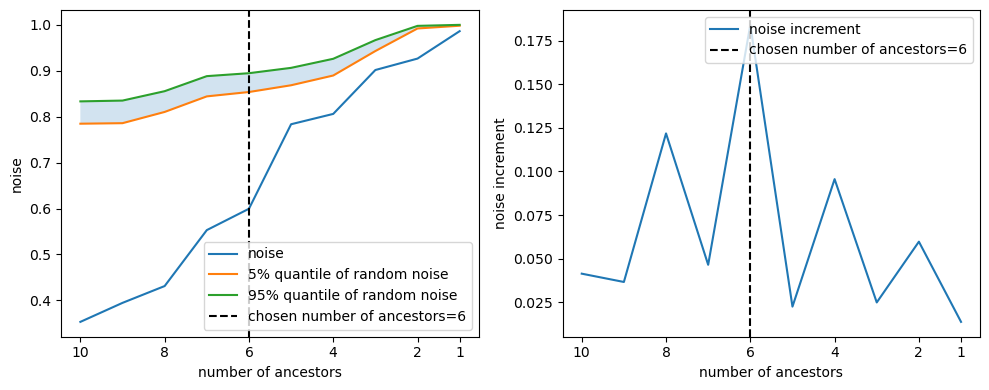

ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients', 'new_confirmed', 'new_deceased', 'vaccination_policy', 'stringency_index'] 



inspecting restrictions_on_internal_movement
linear kernel (using gamma=9.03e+00)
 n/(n+s)=0.64, Z=0.99
quadratic kernel (using gamma=3.14e+00)
 n/(n+s)=0.55, Z=0.98
what about median ? 1.3199268334243357
gaussian kernel (using gamma=1.18e+00)
 n/(n+s)=0.17, Z=0.77
restrictions_on_internal_movement has ancestors with gaussian kernel (n/(s+n)=0.17)
what about median ? 0.2697516991263751
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_tested', 'new_vaccine_doses_administered', 'facial_coverings', 'vaccination_policy', 'stringency_index']
 n/(n+s)=0.24, Z=0.80
what about median ? 0.03690398804202463
ancestors : ['current_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_tested', 'new_vaccine_doses_administered'

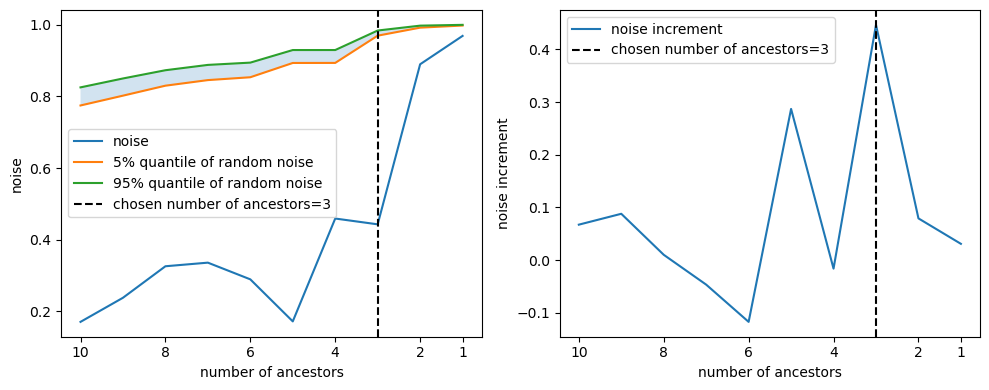

ancestors after pruning:  ['current_hospitalized_patients', 'current_intensive_care_patients', 'stringency_index'] 



inspecting new_confirmed
linear kernel (using gamma=1.33e+01)
 n/(n+s)=0.83, Z=0.99
quadratic kernel (using gamma=7.04e+00)
 n/(n+s)=0.78, Z=0.98
what about median ? 0.76283824748844
gaussian kernel (using gamma=7.90e-01)
 n/(n+s)=0.56, Z=0.79
new_confirmed has ancestors with gaussian kernel (n/(s+n)=0.56)
what about median ? 0.3424780291840673
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered', 'facial_coverings', 'vaccination_policy', 'stringency_index']
 n/(n+s)=0.57, Z=0.79
what about median ? 0.13103394170714808
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered', 'facial_coverings', 'stringency_index']
 n/(n+s)=0.58, Z=0.80


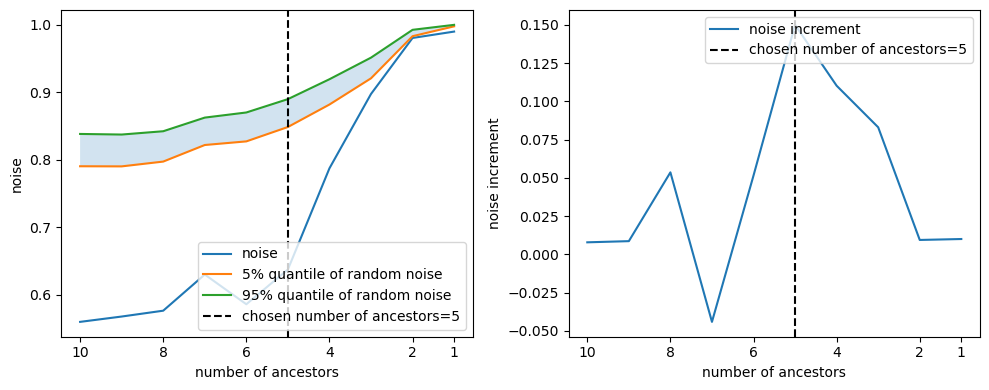

ancestors after pruning:  ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased', 'new_tested'] 



inspecting new_deceased
linear kernel (using gamma=9.81e+00)
 n/(n+s)=0.77, Z=0.99
quadratic kernel (using gamma=7.69e+00)
 n/(n+s)=0.76, Z=0.98
what about median ? 0.609987275911394
gaussian kernel (using gamma=5.64e-01)
 n/(n+s)=0.72, Z=0.80
new_deceased has ancestors with gaussian kernel (n/(s+n)=0.72)
what about median ? 0.21544493244220778
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_movement', 'new_confirmed', 'new_tested', 'new_vaccine_doses_administered', 'vaccination_policy', 'stringency_index']
 n/(n+s)=0.68, Z=0.81
what about median ? 0.09416952799780727
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_confirmed', 'new_tested', 'new_vaccine_doses_administered', 'vac

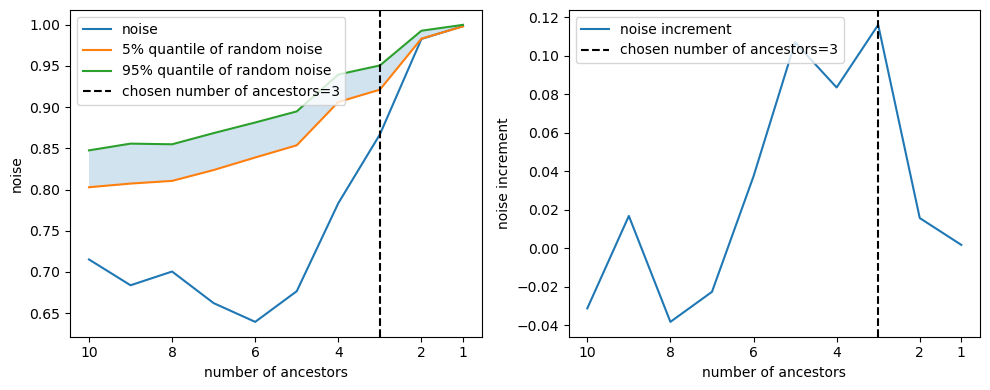

ancestors after pruning:  ['new_hospitalized_patients', 'new_tested', 'new_vaccine_doses_administered'] 



inspecting new_tested
linear kernel (using gamma=1.25e+01)
 n/(n+s)=0.77, Z=0.99
quadratic kernel (using gamma=7.13e+00)
 n/(n+s)=0.66, Z=0.98
what about median ? 0.6173479312749904
gaussian kernel (using gamma=5.41e-01)
 n/(n+s)=0.68, Z=0.80
new_tested has ancestors with quadratic kernel (n/(s+n)=0.66)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_movement', 'new_confirmed', 'new_deceased', 'new_vaccine_doses_administered', 'facial_coverings', 'vaccination_policy']
 n/(n+s)=0.65, Z=0.98
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_movement', 'new_deceased', 'new_vaccine_doses_administered', 'facial_coverings', 'vaccination_policy']
 n/(n+s)=0.64, Z=0.98
ancestors : ['new_hospitalized_patients', 'curre

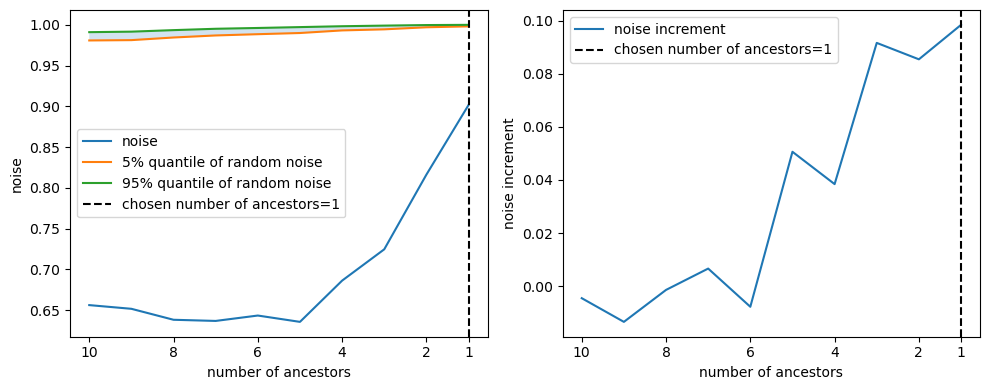

ancestors after pruning:  ['facial_coverings'] 



inspecting new_vaccine_doses_administered
linear kernel (using gamma=1.47e+01)
 n/(n+s)=0.82, Z=0.99
quadratic kernel (using gamma=6.32e+00)
 n/(n+s)=0.66, Z=0.98
what about median ? 0.7640542213595208
gaussian kernel (using gamma=6.65e-01)
 n/(n+s)=0.72, Z=0.79
new_vaccine_doses_administered has ancestors with quadratic kernel (n/(s+n)=0.66)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'restrictions_on_internal_movement', 'new_confirmed', 'new_deceased', 'new_tested', 'facial_coverings', 'vaccination_policy', 'stringency_index']
 n/(n+s)=0.67, Z=0.98
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'restrictions_on_internal_movement', 'new_confirmed', 'new_tested', 'facial_coverings', 'vaccination_policy', 'stringency_index']
 n/(n+s)=0.67, Z=0.98
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'restrictions_on_internal_movement', 'new_tested', 'facial_

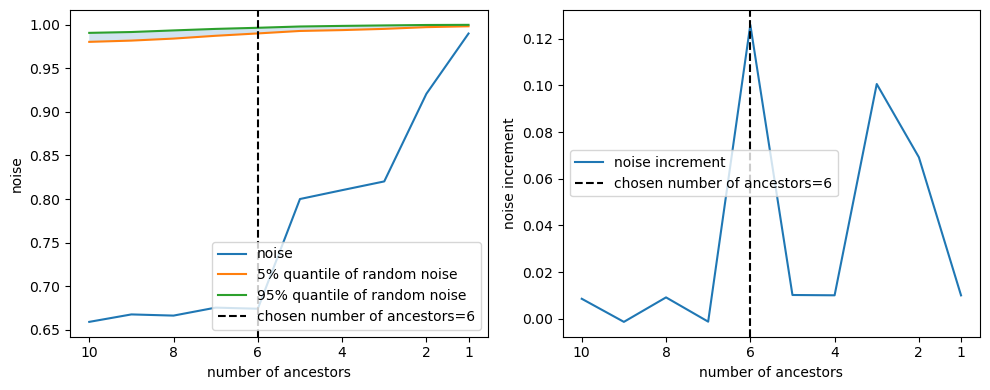

ancestors after pruning:  ['current_hospitalized_patients', 'restrictions_on_internal_movement', 'new_tested', 'facial_coverings', 'vaccination_policy', 'stringency_index'] 



inspecting facial_coverings
linear kernel (using gamma=9.16e+00)
 n/(n+s)=0.71, Z=0.99
quadratic kernel (using gamma=6.42e+00)
 n/(n+s)=0.70, Z=0.98
what about median ? 1.1667398569620477
gaussian kernel (using gamma=9.59e-01)
 n/(n+s)=0.75, Z=0.78
facial_coverings has ancestors with quadratic kernel (n/(s+n)=0.70)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_movement', 'new_confirmed', 'new_tested', 'new_vaccine_doses_administered', 'vaccination_policy', 'stringency_index']
 n/(n+s)=0.69, Z=0.98
ancestors : ['current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_movement', 'new_confirmed', 'new_tested', 'new_vaccine_doses_administered', 'vaccination_policy', 'stringency_index']
 n/(n

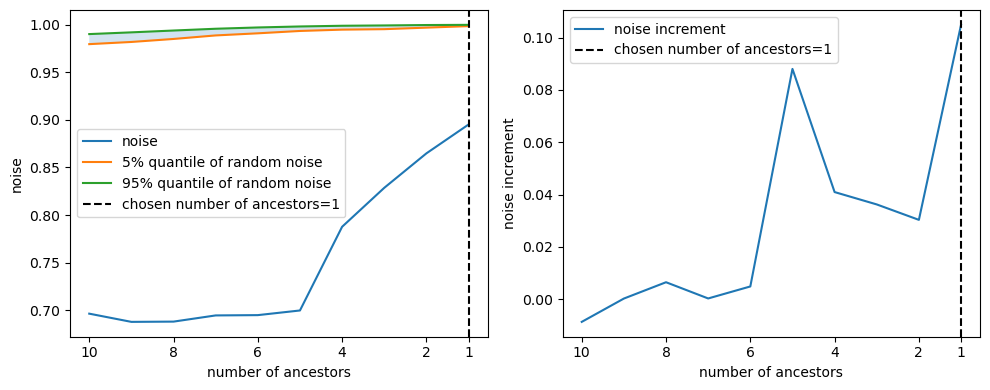

ancestors after pruning:  ['current_intensive_care_patients'] 



inspecting vaccination_policy
linear kernel (using gamma=1.14e+01)
 n/(n+s)=0.77, Z=0.99
quadratic kernel (using gamma=5.01e+00)
 n/(n+s)=0.64, Z=0.98
what about median ? 1.1273916581337626
gaussian kernel (using gamma=1.13e+00)
 n/(n+s)=0.67, Z=0.78
vaccination_policy has ancestors with quadratic kernel (n/(s+n)=0.64)
ancestors : ['current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_movement', 'new_confirmed', 'new_deceased', 'new_tested', 'new_vaccine_doses_administered', 'facial_coverings', 'stringency_index']
 n/(n+s)=0.64, Z=0.98
ancestors : ['current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_movement', 'new_confirmed', 'new_tested', 'new_vaccine_doses_administered', 'facial_coverings', 'stringency_index']
 n/(n+s)=0.61, Z=0.98
ancestors : ['current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_

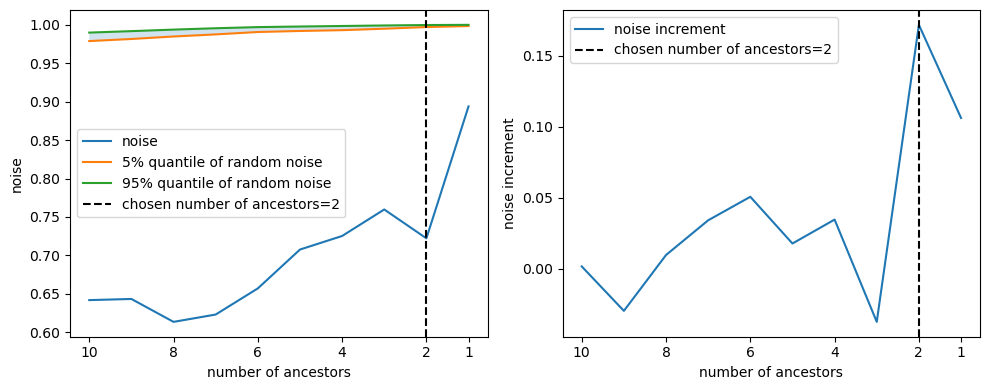

ancestors after pruning:  ['new_vaccine_doses_administered', 'facial_coverings'] 



inspecting stringency_index
linear kernel (using gamma=9.67e+00)
 n/(n+s)=0.66, Z=0.99
quadratic kernel (using gamma=1.68e+00)
 n/(n+s)=0.29, Z=0.98
what about median ? 1.287419503976564
gaussian kernel (using gamma=1.17e+00)
 n/(n+s)=0.39, Z=0.78
stringency_index has ancestors with quadratic kernel (n/(s+n)=0.29)
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_movement', 'new_confirmed', 'new_tested', 'new_vaccine_doses_administered', 'facial_coverings', 'vaccination_policy']
 n/(n+s)=0.29, Z=0.98
ancestors : ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'restrictions_on_internal_movement', 'new_tested', 'new_vaccine_doses_administered', 'facial_coverings', 'vaccination_policy']
 n/(n+s)=0.31, Z=0.98
ancestors : ['current_hospitalized_patients', 'current_intensive

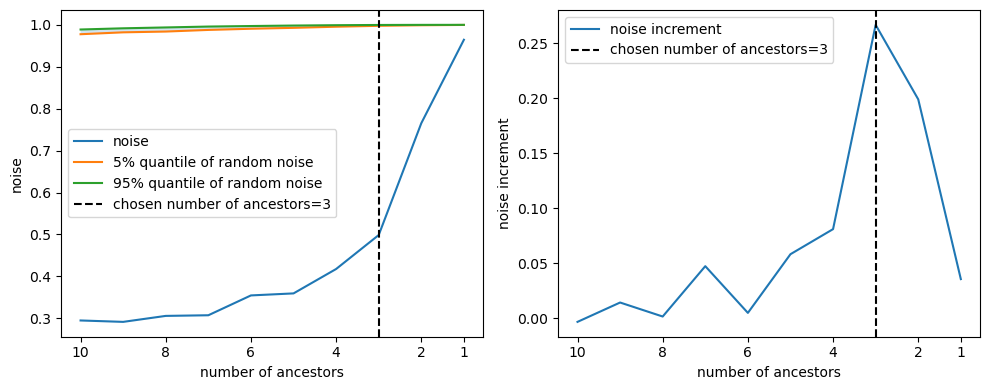

ancestors after pruning:  ['restrictions_on_internal_movement', 'new_vaccine_doses_administered', 'facial_coverings'] 





In [72]:
modes_reduced=ModeContainer.make_container(
    X_reduced.T,
    onp.array(reduced_names),
    {'name':'linear','beta':0.1,'type':'individual','interpolatory':False,'default':True},
    {'name':'quadratic','beta':0.1,'type':'pairwise','interpolatory':False,'default':True},
    {'name':'gaussian','beta':0.1,'type':'combinatorial','interpolatory':True,'default':True,'l':1},
)

graph_discovery_reduced=GraphDiscoveryNew(X_reduced.T,onp.array(reduced_names),modes_reduced)
for node in graph_discovery_reduced.names:
    print(f'inspecting {node}')
    graph_discovery_reduced.find_ancestors(
        node,
        gamma='auto',
    )
    print('\n')

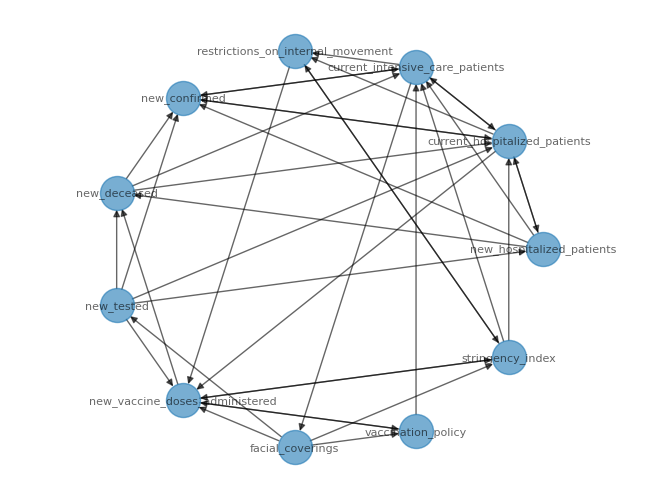

In [73]:
plot_a_network(graph_discovery_reduced.G,False)